# Reproducing Lorenz Model

### Install necessary packages:

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.integrate import solve_ivp
import pysindy as ps

In [2]:
# Seed the random number generators for reproducibility
np.random.seed(100)

### Define Lorentz system to produce training data:

Define system constants:

In [3]:
sigma = 7.2
rho = 25
beta = 8/3

Define system DEs as function:

In [4]:
def lorenz(t, x):
    return [
        sigma*(x[1] - x[0]),
        x[0]*(rho - x[2]) - x[1],
        x[0]*x[1] - beta*x[2]
    ]

Generate measurement (training) data:

In [5]:
dt = .01  # Timestep

t_train = np.arange(0, 10, dt)  # Time range to integrate over
x0_train = [-8, 8, 27]  # Initial Conditions
sol = solve_ivp(lorenz, (t_train[0], t_train[-1]), x0_train, t_eval=t_train)  # Integrate to produce x(t),y(t),z(t)
x_train = np.transpose(sol.y) 

### Instantiate and fit the SINDy model:

In [6]:
model = ps.SINDy()
model.fit(x_train, t=dt)
model.print()

x0' = -7.192 x0 + 7.192 x1
x1' = 24.787 x0 + -0.958 x1 + -0.992 x0 x2
x2' = -2.659 x2 + 0.997 x0 x1


### Assess results on a test trajectory:

In [7]:
# Evolve the Lorenz equations in time using a different initial condition
t_test = np.arange(0, 25, dt)  # Longer time range
x0_test = np.array([8, 7, 15])  # New initial conditions
sol = solve_ivp(lorenz, (t_test[0], t_test[-1]), x0_test, t_eval=t_test) # Integrate to produce x(t),y(t),z(t)
x_test = np.transpose(sol.y) 

# Compare SINDy-predicted derivatives with finite difference derivatives
print('Model score: %f' % model.score(x_test, t=dt))

Model score: 0.999925


### Simulate forward in time:

[Text(0.5, 0, 'x'),
 Text(0.5, 0, 'y'),
 Text(0.5, 0, 'z'),
 Text(0.5, 0.92, 'model simulation')]

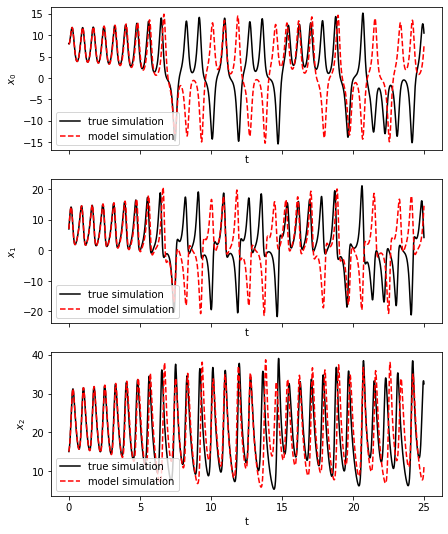

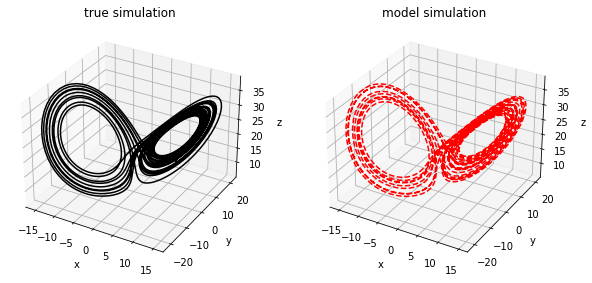

In [8]:
x_test_sim = model.simulate( x0_test , t_test )
fig, axs = plt.subplots(x_test.shape[1], 1, sharex=True, figsize=(7, 9))
for i in range(x_test.shape[1]):
    axs[i].plot(t_test, x_test[:, i], 'k', label='true simulation')
    axs[i].plot(t_test, x_test_sim[:, i], 'r--', label='model simulation')
    axs[i].legend()
    axs[i].set(xlabel='t', ylabel='$x_{}$'.format(i))
    #axs[i].set_xlim(24,25)

fig = plt.figure(figsize=(10, 4.5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(x_test[:, 0], x_test[:, 1], x_test[:, 2], 'k')
ax1.set(xlabel='x', ylabel='y',
        zlabel='z', title='true simulation')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(x_test_sim[:, 0], x_test_sim[:, 1], x_test_sim[:, 2], 'r--')
ax2.set(xlabel='x', ylabel='y',
        zlabel='z', title='model simulation')

